In [22]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
df = pd.read_csv('yelp.csv')

In [24]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [16]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [30]:
df['text_length'] = df['text'].apply(len)

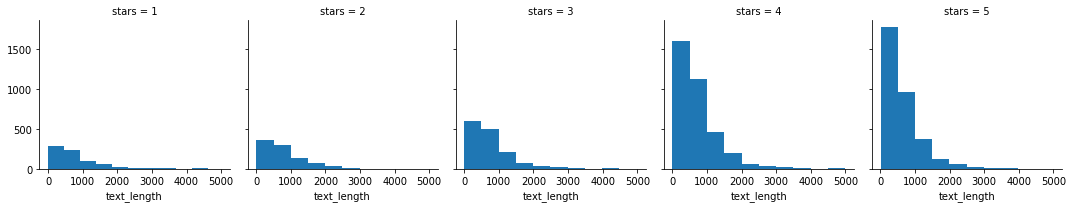

In [31]:
g = sns.FacetGrid(df,col="stars")
g.map(plt.hist,'text_length')

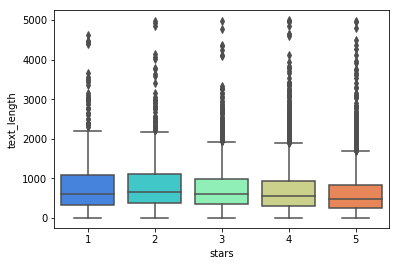

In [36]:
sns.boxplot(x='stars',y='text_length',data=df,palette='rainbow')

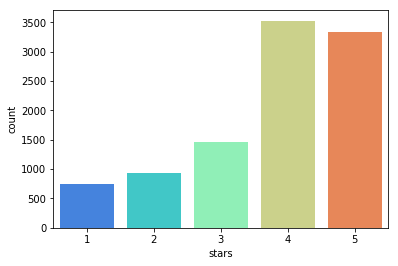

In [37]:
sns.countplot(x="stars",data=df,palette='rainbow')

In [38]:
df.groupby('stars').mean()

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [39]:
df.groupby('stars').corr()

cool     funny  text_length    useful
stars                                                       
1     cool         1.000000  0.802161     0.276812  0.759015
      funny        0.802161  1.000000     0.261910  0.667355
      text_length  0.276812  0.261910     1.000000  0.334015
      useful       0.759015  0.667355     0.334015  1.000000
2     cool         1.000000  0.826350     0.276901  0.785922
      funny        0.826350  1.000000     0.265515  0.669214
      text_length  0.276901  0.265515     1.000000  0.306575
      useful       0.785922  0.669214     0.306575  1.000000
3     cool         1.000000  0.832051     0.260068  0.853302
      funny        0.832051  1.000000     0.256729  0.760241
      text_length  0.260068  0.256729     1.000000  0.300406
      useful       0.853302  0.760241     0.300406  1.000000
4     cool         1.000000  0.851593     0.273000  0.902031
      funny        0.851593  1.000000     0.233477  0.794473
      text_length  0.273000  0.233477     1.000000  0.308183
      useful       0.902031  0.794473     0.308183  1.000000
5     cool         1.000000  0.718411     0.237470  0.926913
      funny        0.718411  1.000000     0.251961  0.692654
      text_length  0.237470  0.251961     1.000000  0.278288
      useful       0.926913  0.692654     0.278288  1.000000

In [78]:
yelp_class = df[(df.stars==1)|(df.stars==5)]

In [79]:
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [80]:
X = yelp_class['text']
y = yelp_class.stars
X

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
6       Drop what you're doing and drive here. After I...
9       Nobuo shows his unique talents with everything...
10      The oldish man who owns the store is as sweet ...
11      Wonderful Vietnamese sandwich shoppe. Their ba...
12      They have a limited time thing going on right ...
17      okay this is the best place EVER! i grew up sh...
21      This place shouldn't even be reviewed - becaus...
22      first time my friend and I went there... it wa...
23      U can go there n check the car out. If u wanna...
24      I love this place! I have been coming here for...
26      I love love LOVE this place. My boss (who is i...
30      Disclaimer: Like many of you, I am a sucker fo...
31      Disgusting!  Had a Groupon so my daughter and ...
32      Never 

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [82]:
X = cv.fit_transform(X)
X.nnz

317288

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [85]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [86]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [87]:
predictions = nb.predict(X_test)

In [88]:
predictions

array([5, 1, 5, ..., 5, 5, 5], dtype=int64)

In [89]:
from sklearn.metrics import classification_report,confusion_matrix

In [90]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226

